
=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize     

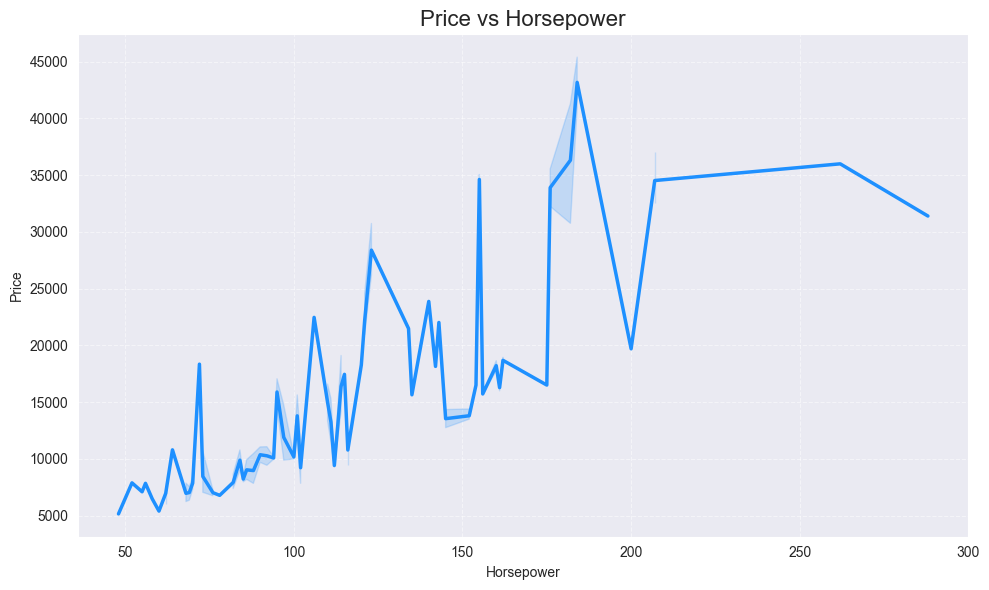

C:\Users\saswa\AppData\Local\Temp\ipykernel_1672\4020002779.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carbody', y='price', data=df, errorbar=None, palette='viridis')


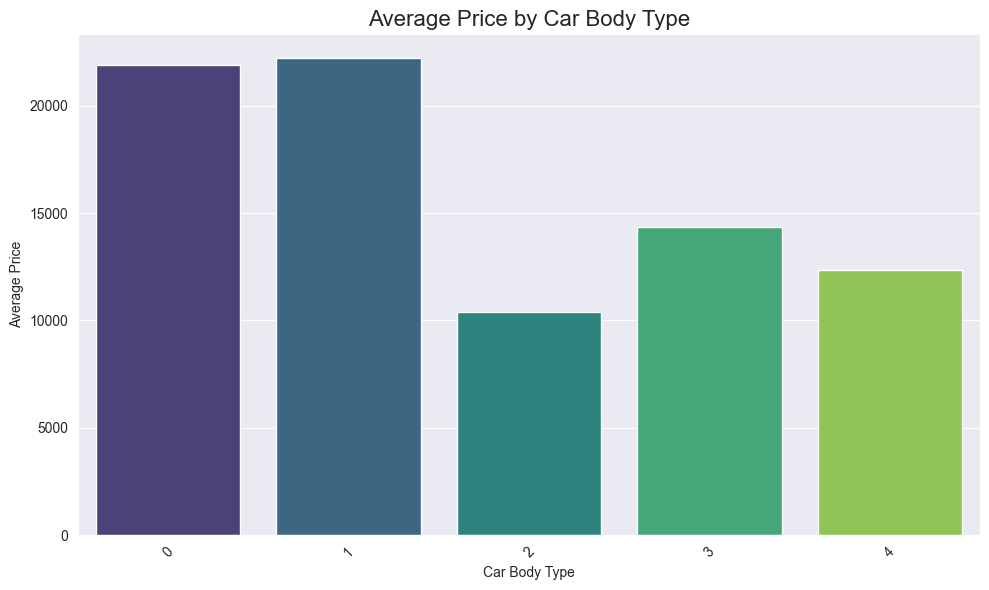

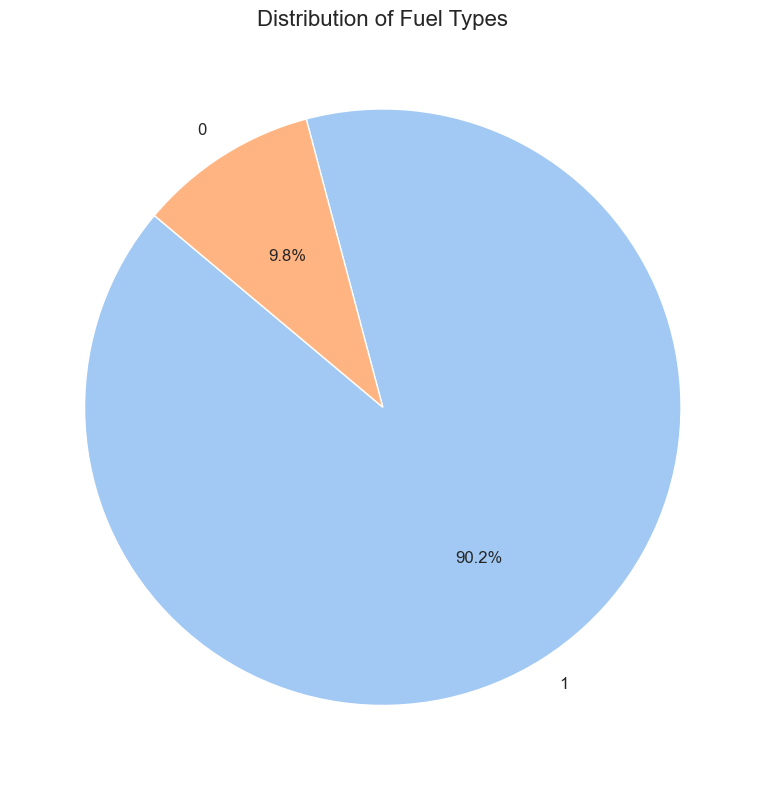

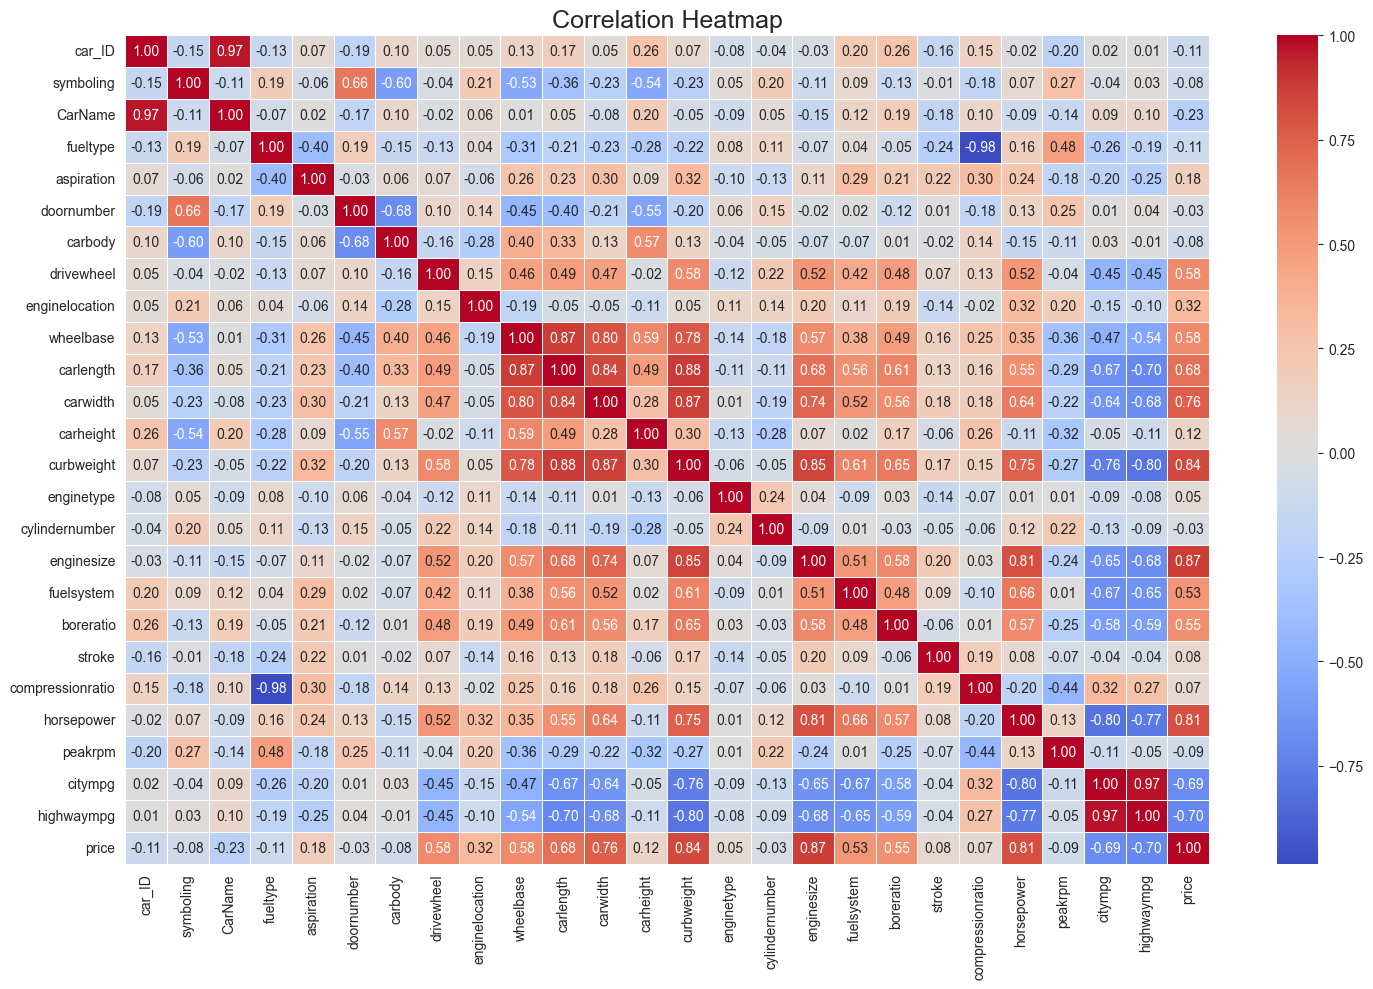


=== Model Evaluation ===
Mean Squared Error (MSE): 15916389.73
Mean Absolute Error (MAE): 2526.41
R-squared (R2) Score: 0.80

=== Regression Coefficients ===
             Feature   Coefficient
6     enginelocation  10914.913463
1           fueltype   3619.406201
5         drivewheel   1082.002768
2         aspiration    652.215819
9           carwidth    596.057463
18  compressionratio    437.871859
12        enginetype    353.705916
0          symboling    212.749602
7          wheelbase    202.902616
14        enginesize     93.917829
10         carheight     92.260008
22        highwaympg     83.058009
19        horsepower     13.287421
11        curbweight      1.810028
20           peakrpm      1.763526
8          carlength    -55.851542
15        fuelsystem    -65.807792
21           citympg   -259.081718
13    cylindernumber   -472.594361
4            carbody  -1006.117029
3         doornumber  -1466.670746
17            stroke  -2126.186699
16         boreratio  -2400.205123


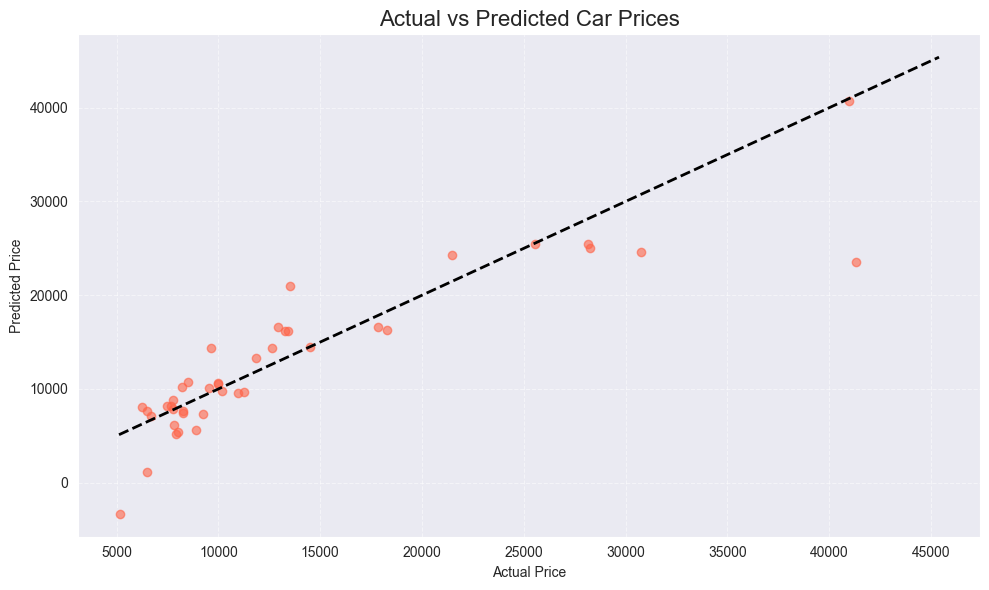


=== Regression Equation ===
Price = (212.75 * symboling) + (3619.41 * fueltype) + (652.22 * aspiration) + (-1466.67 * doornumber) + (-1006.12 * carbody) + (1082.00 * drivewheel) + (10914.91 * enginelocation) + (202.90 * wheelbase) + (-55.85 * carlength) + (596.06 * carwidth) + (92.26 * carheight) + (1.81 * curbweight) + (353.71 * enginetype) + (-472.59 * cylindernumber) + (93.92 * enginesize) + (-65.81 * fuelsystem) + (-2400.21 * boreratio) + (-2126.19 * stroke) + (437.87 * compressionratio) + (13.29 * horsepower) + (1.76 * peakrpm) + (-259.08 * citympg) + (83.06 * highwaympg) + -55649.45

=== Real-time Test ===
Sample Car Features:
    symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
15          0         1           0           0        3           2   

    enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
15               0      103.5      189.0      66.9  ...               3   

    enginesize  fuelsystem  boreratio  stroke  compressionrati

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Read the dataset
df = pd.read_csv('CarPrice.csv')

# Step 2: Perform EDA (Exploratory Data Analysis)

# Display basic information
print("\n=== Dataset Information ===")
print(df.info())

# Display statistical summary
print("\n=== Statistical Summary ===")
print(df.describe())

# Check for null values
print("\n=== Null Values ===")
print(df.isnull().sum())

# Data Cleaning
# Remove duplicates if any
df = df.drop_duplicates()

# Handle missing values (if any)
# For numerical columns, fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Remove empty columns if any
df = df.dropna(axis=1, how='all')

# Step 3: Data Visualization

# Set style for plots
sns.set_style('whitegrid')

# Line plot - Price vs Horsepower
plt.figure(figsize=(10, 6))
sns.lineplot(x='horsepower', y='price', data=df)
plt.title('Price vs Horsepower')
plt.show()

# Bar plot - Average Price by Car Body Type
plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='price', data=df)
plt.title('Average Price by Car Body Type')
plt.xticks(rotation=45)
plt.show()

# Pie chart - Distribution of Fuel Types
plt.figure(figsize=(8, 8))
df['fueltype'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Identify features and labels
X = df.drop(['price', 'car_ID', 'CarName'], axis=1)  # Features
y = df['price']  # Target variable

# Step 5: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Step 8: Visualize the model

# Get regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Regression Coefficients ===")
print(coefficients)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Step 9: Generate regression equation
print("\n=== Regression Equation ===")
equation = "Price = "
for i, (feature, coef) in enumerate(zip(X.columns, model.coef_)):
    equation += f"({coef:.2f} * {feature}) + "
equation += f"{model.intercept_:.2f}"
print(equation)

# Step 10: Save the model
import joblib
joblib.dump(model, 'car_price_predictor.pkl')

# Step 11: Test the model in real-time (example)
# Load the saved model
loaded_model = joblib.load('car_price_predictor.pkl')

# Create a sample car data for prediction
sample_car = X_test.iloc[0:1]  # Taking first row from test set
predicted_price = loaded_model.predict(sample_car)

print("\n=== Real-time Test ===")
print(f"Sample Car Features:\n{sample_car}")
print(f"Predicted Price: ${predicted_price[0]:.2f}")
print(f"Actual Price: ${y_test.iloc[0]:.2f}")

# Step 12: Draw Conclusion
print("\n=== Conclusion ===")
print("1. The linear regression model has been successfully trained to predict car prices.")
print(f"2. The model achieves an R-squared score of {r2:.2f}, indicating it explains about {r2*100:.0f}% of the variance in car prices.")
print("3. Key factors influencing car prices include:")
print("   - Positive correlation with horsepower, engine size, and wheelbase")
print("   - Negative correlation with city mpg and highway mpg")
print("4. The model can be improved by:")
print("   - Feature engineering to create more meaningful predictors")
print("   - Trying more complex models if linear relationship is insufficient")
print("5. The model is saved and can be deployed for real-time predictions.")

In [5]:
import joblib

# Load the model
model = joblib.load('car_price_predictor.pkl')

# View basic info
print("Model Type:", type(model))

# If it's a LinearRegression model, you can inspect it like this:
print("\nModel Coefficients:")
print(model.coef_)

print("\nModel Intercept:")
print(model.intercept_)

Model Type: <class 'sklearn.linear_model._base.LinearRegression'>

Model Coefficients:
[ 2.12749602e+02  3.61940620e+03  6.52215819e+02 -1.46667075e+03
 -1.00611703e+03  1.08200277e+03  1.09149135e+04  2.02902616e+02
 -5.58515415e+01  5.96057463e+02  9.22600077e+01  1.81002785e+00
  3.53705916e+02 -4.72594361e+02  9.39178289e+01 -6.58077922e+01
 -2.40020512e+03 -2.12618670e+03  4.37871859e+02  1.32874206e+01
  1.76352573e+00 -2.59081718e+02  8.30580089e+01]

Model Intercept:
-55649.44599646265
